## 🛍️ Customer Segmentation with Clustering




📌 Task Overview
In this task, we aim to segment mall customers based on their income and spending behavior using unsupervised learning (clustering).

🎯 Objectives

Preprocess and scale the data

Visualize the customer data

Apply K-Means clustering and determine the optimal number of clusters

Visualize resulting clusters

In [3]:
# Load data, build linear and polynomial regression models, evaluate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df = pd.read_csv(r'C:\Users\g3fr\Desktop\elevvo internship\Task 2\Mall_Customers.csv')

## Dataset Overview


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#summary about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
print(len(df))
print(df.shape)

200
(200, 5)


In [9]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##  Check for Missing Values and nulles

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

##  Exploratory Data Analysis (EDA)

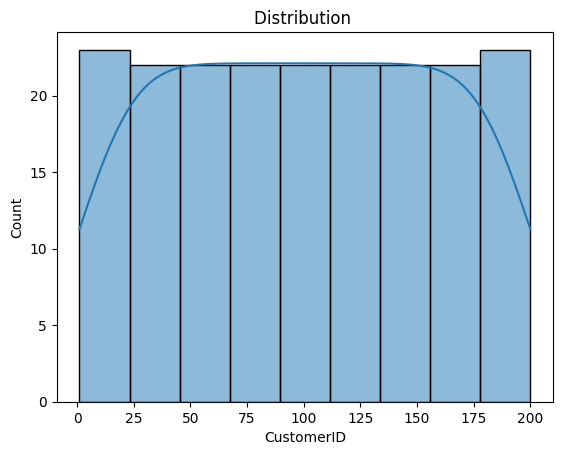

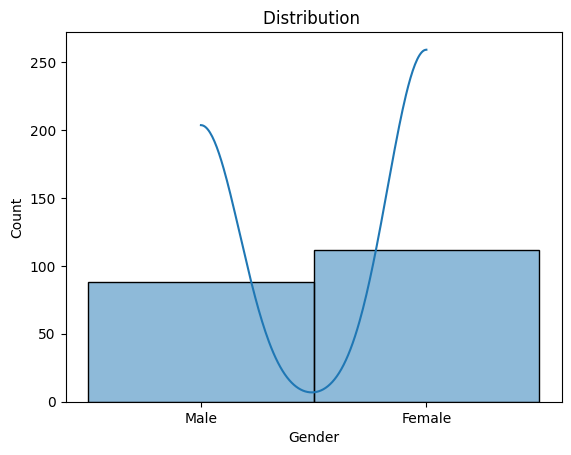

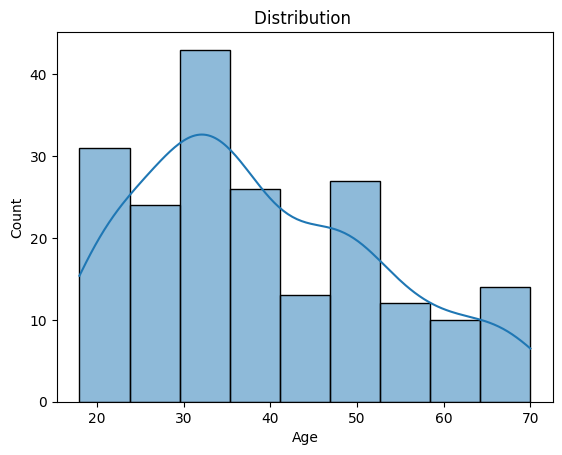

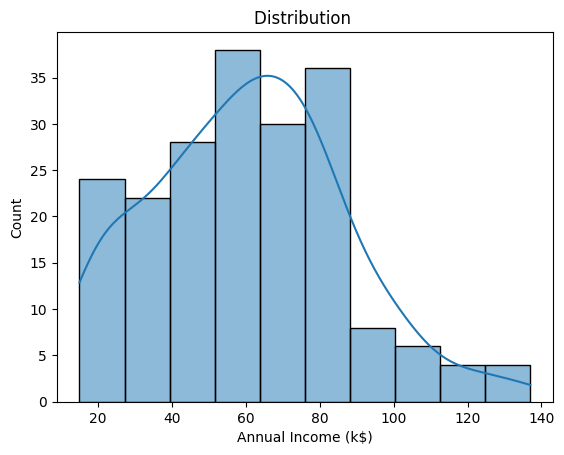

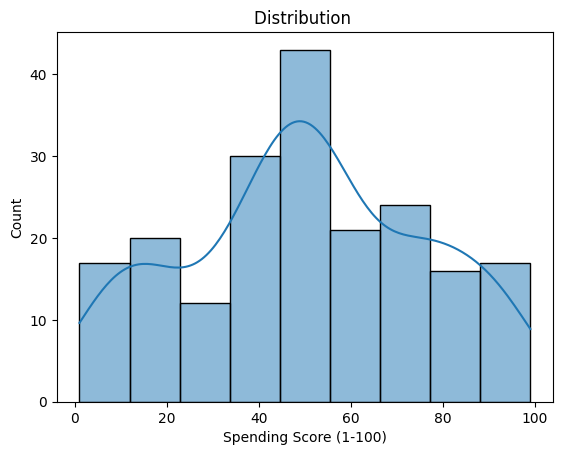

In [12]:
for i in df.columns:
  sns.histplot(df[i], kde=True)
  plt.title('Distribution ')
  plt.show()

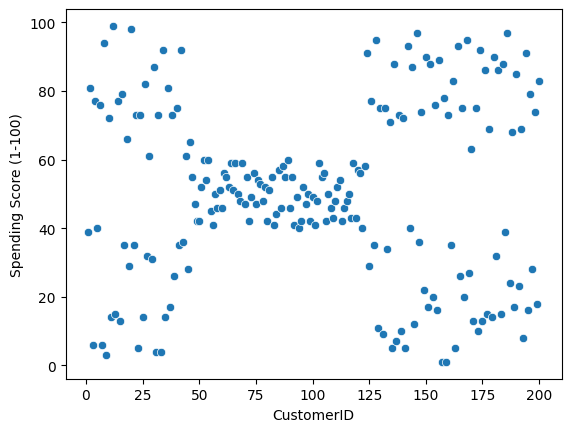

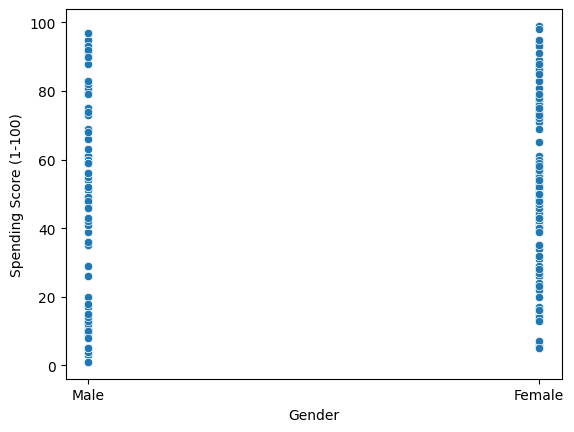

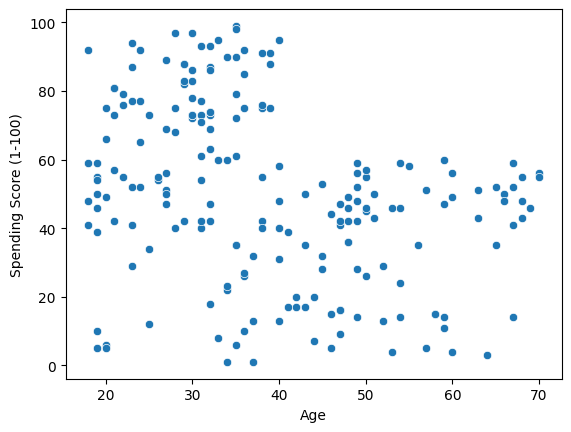

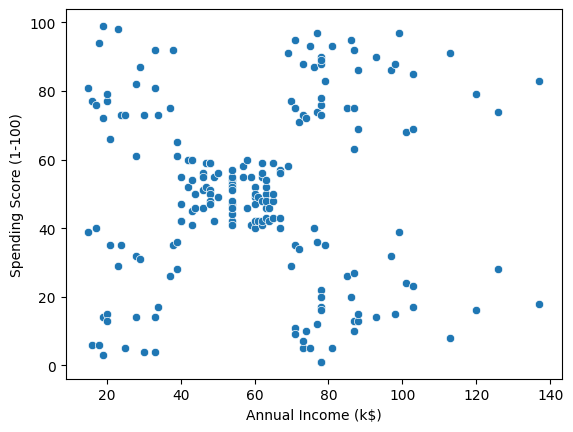

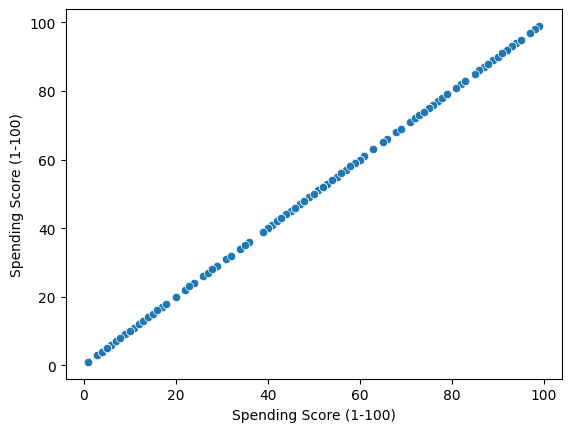

In [13]:
for i in df.columns:
  sns.scatterplot(x=i, y='Spending Score (1-100)', data=df)
  plt.show()

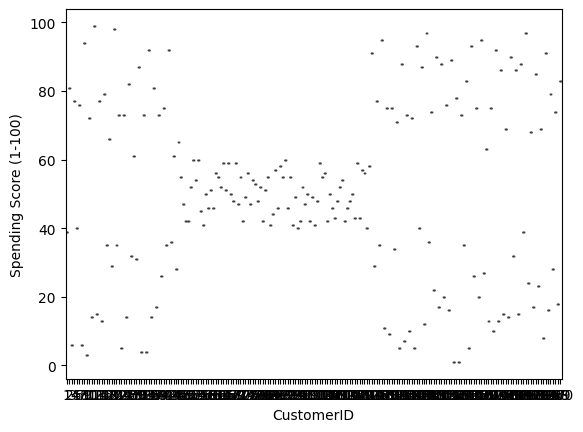

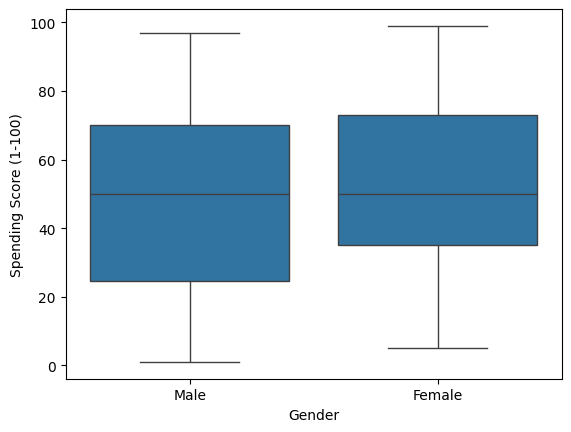

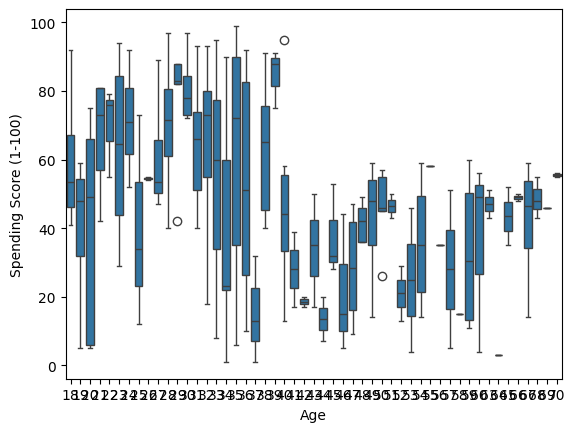

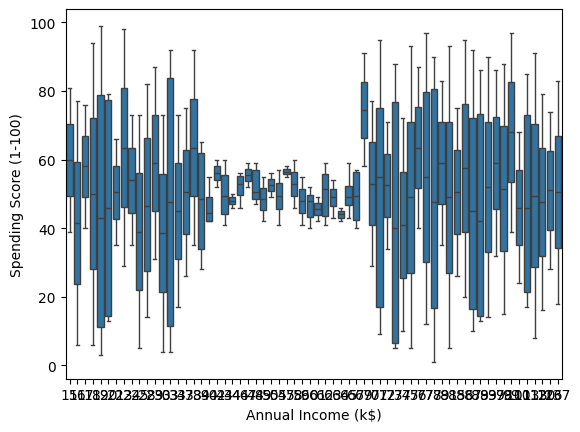

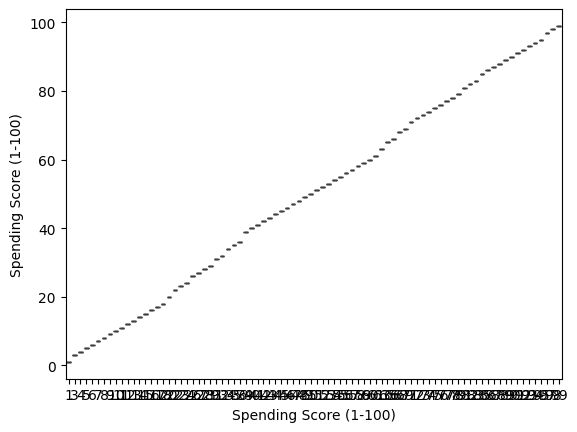

In [14]:
for i in df.columns:
  sns.boxplot(x=i, y='Spending Score (1-100)', data=df)
  plt.show()

##  Feature Scaling

In [15]:
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(df_scaled[['Annual Income (k$)','Spending Score (1-100)']])
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959


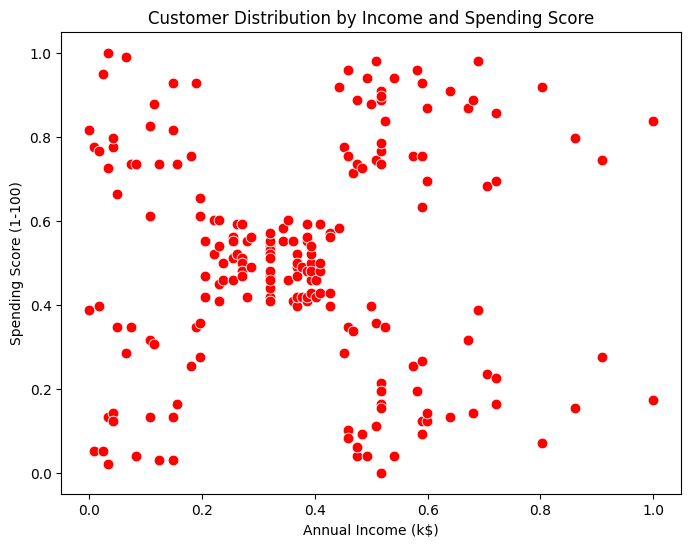

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)' , y= 'Spending Score (1-100)' , data = df_scaled , s=60 , color='Red')
plt.title('Customer Distribution by Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Determine Optimal K using the Elbow Method

To find the optimal number of clusters for K-Means, we apply the Elbow Method. This involves:

Running K-Means clustering on the dataset for a range of values for K (e.g., 1 to 10).

Calculating the Within-Cluster Sum of Squares (WCSS) for each K.

Plotting the WCSS values against K.

Identifying the "elbow point" in the plot — the value of K where the WCSS starts to diminish more slowly. This point suggests a suitable trade-off between model complexity and performance.

The "elbow" represents the point where adding more clusters doesn't significantly improve the model fit.

In [17]:
k_rng = range(1,10)
wss = []
for k in k_rng:
    km = KMeans(n_clusters = k , random_state=42)
    km.fit(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
    wss.append(km.inertia_)

wss

[23.040720326039906,
 14.085982559040602,
 9.059792751166924,
 6.121856618850359,
 3.58516691306247,
 3.2233070168998754,
 2.909542176792418,
 2.4699952223283117,
 2.287401904321795]

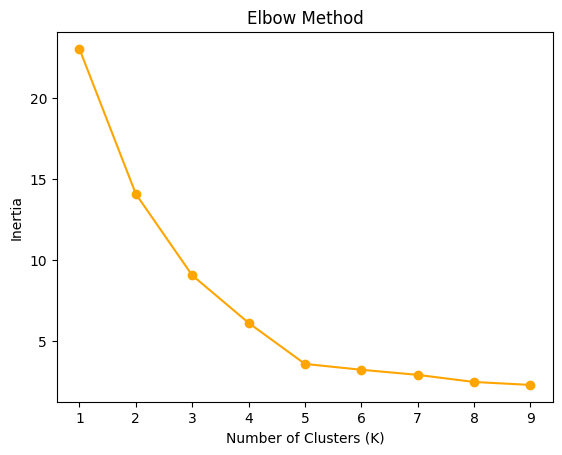

In [18]:

plt.plot(k_rng , wss , marker = 'o' , color='orange')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

**Optimal K Value: K = 5**




After applying the Elbow Method, we observe that the curve begins to flatten significantly at K = 5, indicating the optimal number of clusters.

Opting for K = 5 strikes an effective balance between computational efficiency and clustering precision. This choice results in a noteworthy decrease in the Within-Cluster Sum of Squares (WCSS), suggesting that adding more clusters beyond this point provides diminishing returns in terms of variance reduction.

Thus, we proceed with K = 5 for the K-Means clustering task.

## 🧩 K-Means Clustering


In [19]:
km = KMeans(n_clusters = 5 , random_state=42)
y_predicted = km.fit_predict(df_scaled[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled['cluster'] = y_predicted

In [20]:
df_scaled.head(15)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,2
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,2
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,2


# **Cluster Visualization**

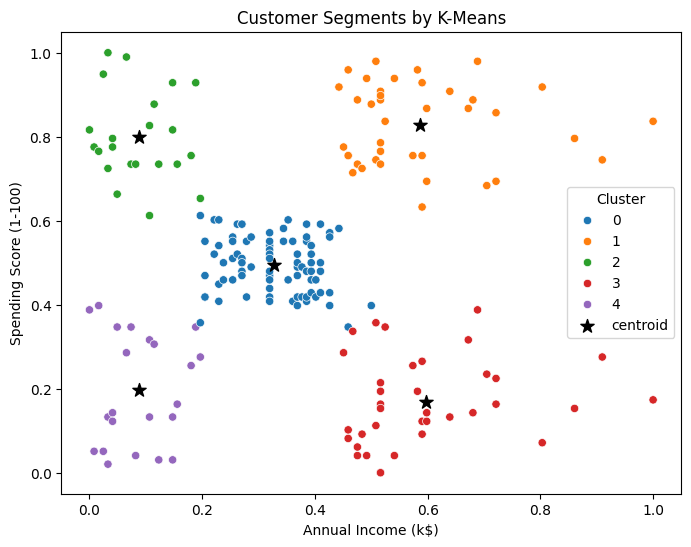

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1] , color='black' ,s = 100 , marker= '*', label='centroid')
plt.title("Customer Segments by K-Means")
plt.legend(title='Cluster')
plt.show()

# 🧠 Agglomerative Clustering for Customer Segmentation

In this section, we apply Agglomerative Clustering, a type of hierarchical clustering algorithm, to segment customers based on their annual income and spending score. Unlike K-Means, this method builds a tree-like structure of clusters by recursively merging the closest pairs of clusters. We choose 5 clusters to align with our segmentation goal and use Ward’s linkage method, which minimizes variance within each cluster. This approach helps uncover customer groupings with potentially nested structures.

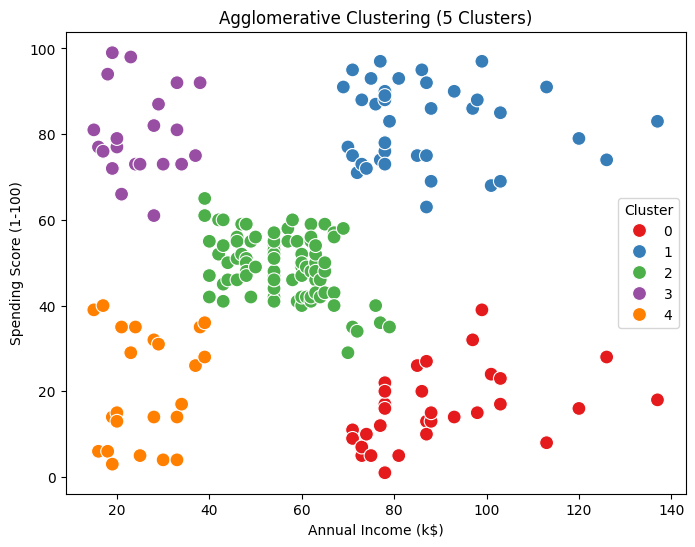

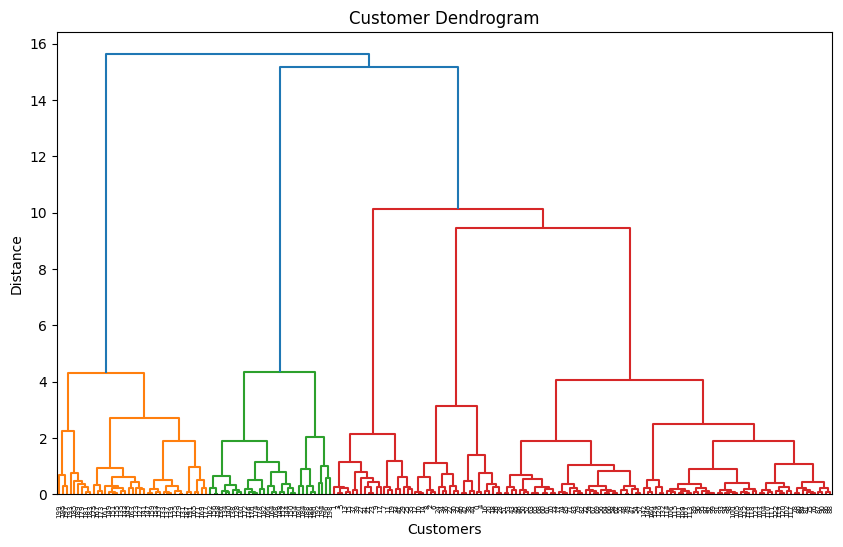

📊 Average Spending Score per Agglomerative Cluster:
   Cluster  Spending Score (1-100)
0        0               15.593750
1        1               82.128205
2        2               49.129412
3        3               80.047619
4        4               20.913043


In [22]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster'] = agglo.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', s=100)
plt.title('Agglomerative Clustering (5 Clusters)')
plt.show()

# Optional: Dendrogram
plt.figure(figsize=(10, 6))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Customer Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

# Average spending per cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean().reset_index()
print("📊 Average Spending Score per Agglomerative Cluster:")
print(avg_spending)